Warning message in sqrt(b^2 - 4 * a * c):
“NaNs produced”Warning message in sqrt(b^2 - 4 * a * c):
“NaNs produced”

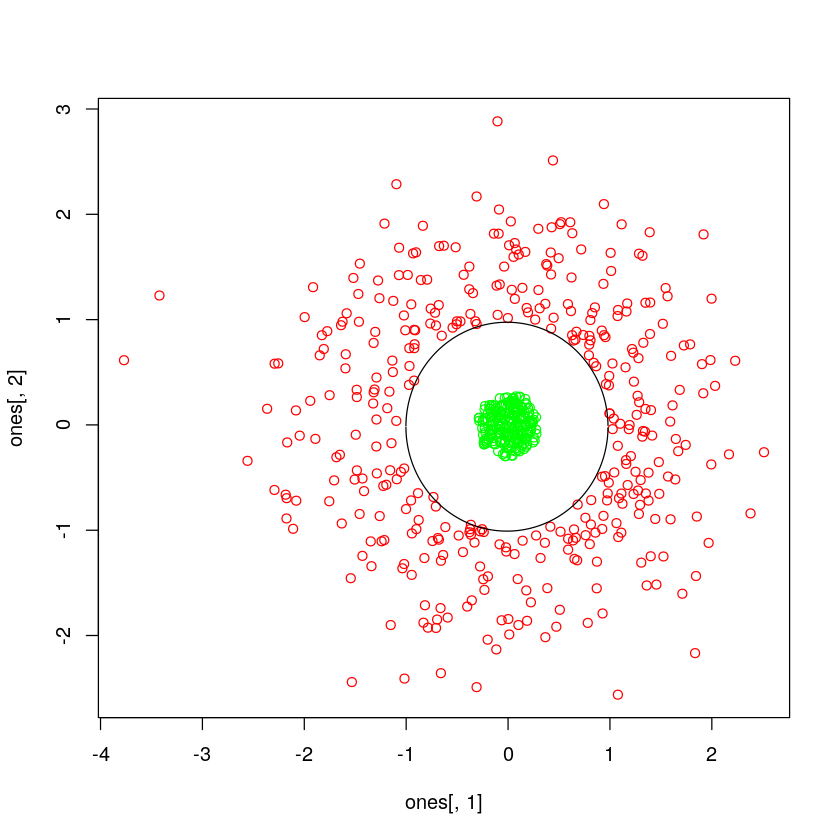

In [1]:
X1 <- rnorm(600)
X2 <- rnorm(600)

r <- sqrt(X1^2 + X2^2)
df<-cbind(X1,X2,r)

Y <- (r > 1)
df<-as.data.frame(cbind(X1,X2,Y))
ones <- df[df[,3] == 1,]
zeros <- df[df[,3] == 0,]*.3

w <- rnorm(4)
Phi <- cbind(rep(1,600),X1, X2, r)

err <- c()
ind <- c()
for(i in 1:20000){
    w <- w - .001*t(Phi)%*%(1/(1+exp(-Phi%*%w)) - Y)
    cost<-Y*log(1/(1+exp(-Phi%*%w))) + (1-Y)*log(1 - 1/(1+exp(-Phi%*%w)))
    err <- c(err,sum(-cost))
    ind <- c(ind,i)
}

x <- seq(-4,4,.0001)
# x2 <- runif(100000,-4,4)*5

a <- -(w[4]**2) + w[3]**2
b <- 2*w[1]*w[3] + 2*w[2]*w[3]*x
c <- -(w[4]**2)*(x**2) + (w[2]**2)*(x**2) + 2*w[1]*w[2]*x + w[1]**2
y1 <- (-b + sqrt(b**2 - 4*a*c))/(2*a)
y2 <- (-b - sqrt(b**2 - 4*a*c))/(2*a)

n<-cbind(x,y1,y2)

new <- n[complete.cases(n),]

plot(ones[,1],ones[,2], col = "red")
points(zeros[,1],zeros[,2], col = "green")
lines(new[,1],new[,2], col = 'black')
lines(new[,1],new[,3], col = 'black')

In [20]:
mean(round(1/(1+exp(-Phi%*%w))) == Y)

[1] 0.9966667

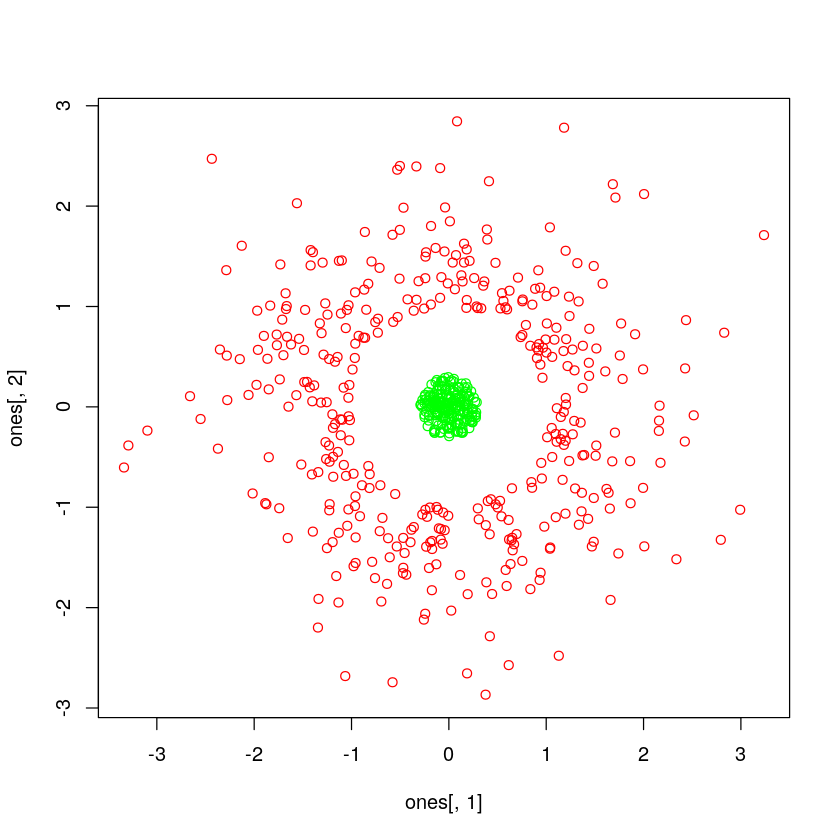

In [3]:
plot(ones[,1],ones[,2], col = "red")
points(zeros[,1],zeros[,2], col = "green")

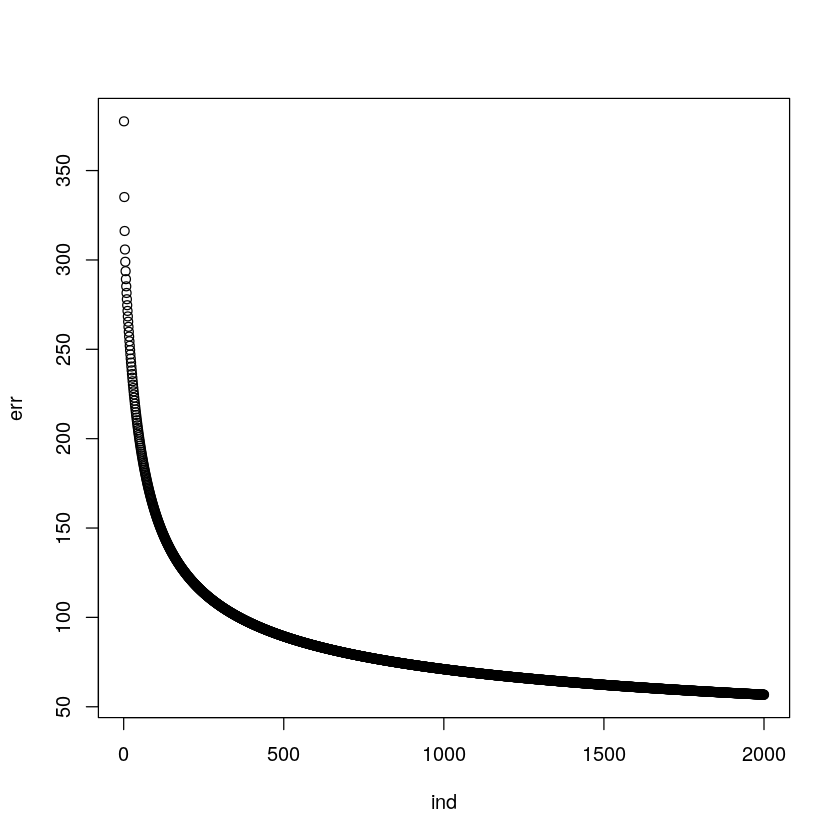

In [4]:

plot(ind,err)

In [5]:
sum(-cost)

[1] 56.75997

Warning message in sqrt(b^2 - 4 * a * c):
“NaNs produced”Warning message in sqrt(b^2 - 4 * a * c):
“NaNs produced”

In [7]:
# y1 <- na.omit(y1)
# y2<- na.omit(y2)


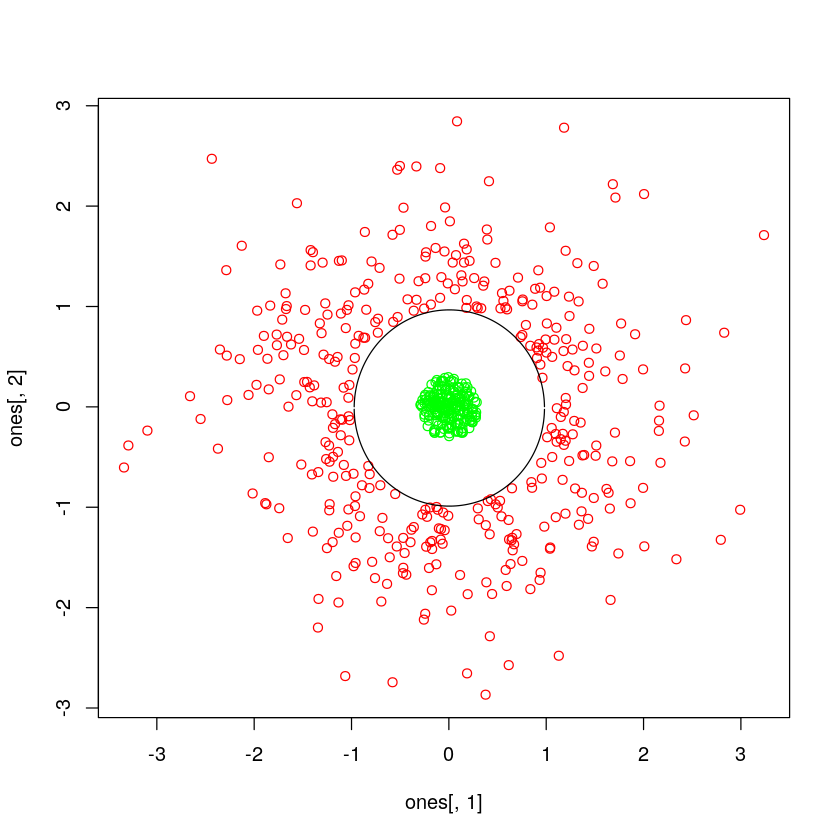